In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import os

import seaborn as sns
import pandas as pd
d1= pd.read_csv('/content/Customer-Churn-Records.csv')
print(d1)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

In [2]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [3]:
X = d1.drop(['Exited'], axis=1)  # Features are all columns except 'Exited'
y = d1['Exited']  # Target variable is 'Exited'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Assuming 'X' contains features and 'y' contains target variable
# Let's drop 'RowNumber', 'CustomerId', and 'Surname' as they are likely irrelevant for prediction
X = d1.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)

# One-hot encoding categorical variables
X_encoded = pd.get_dummies(X, columns=['Geography', 'Gender', 'Card Type'])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Now, fit the model and make predictions
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.799


In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Decision Trees Accuracy:", accuracy)

Decision Trees Accuracy: 0.9975


In [5]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.8035


In [6]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.8


In [7]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("MLP Accuracy:", accuracy)


MLP Accuracy: 0.804


In [8]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.999


In [9]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("LightGBM Accuracy:", accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1645, number of negative: 6355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1131
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205625 -> initscore=-1.351502
[LightGBM] [Info] Start training from score -1.351502
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.999


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machines": SVC(),
    "Decision Trees": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Multi-layer Perceptrons": MLPClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}


In [31]:
# Create DataFrame for accuracy comparison
accuracy_df = pd.DataFrame.from_dict(accuracy_dict, orient='index', columns=['Accuracy'])

# Display accuracy comparison
print("Accuracy Comparison:")
print(accuracy_df)
# Display  recall comparison
recall_df = pd.DataFrame.from_dict(recall_dict, orient='index', columns=['recall'])

print("recall Comparison:")
print(recall_df)
#f1
f1_df = pd.DataFrame.from_dict(f1_dict, orient='index', columns=['f1'])

# Display accuracy comparison
print("Accuracy Comparison:")
print(f1_df)
precision_df = pd.DataFrame.from_dict(precision_dict, orient='index', columns=['precision'])
print(precision_df)

Accuracy Comparison:
                         Accuracy
Logistic Regression        0.7990
Support Vector Machines    0.8035
Decision Trees             0.9980
Naive Bayes                0.8000
Multi-layer Perceptrons    0.3435
Random Forest              0.9990
XGBoost                    0.9990
LightGBM                   0.9990
recall Comparison:
                           recall
Logistic Regression      0.076336
Support Vector Machines  0.000000
Decision Trees           0.997455
Naive Bayes              0.099237
Multi-layer Perceptrons  0.697201
Random Forest            0.997455
XGBoost                  0.997455
LightGBM                 0.997455
Accuracy Comparison:
                               f1
Logistic Regression      0.129870
Support Vector Machines  0.000000
Decision Trees           0.994924
Naive Bayes              0.163180
Multi-layer Perceptrons  0.294465
Random Forest            0.997455
XGBoost                  0.997455
LightGBM                 0.997455
                     

In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, mean_absolute_error
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1 Score:", f1)


SVM Precision: 0.9974554707379135
SVM Recall: 0.9974554707379135
SVM F1 Score: 0.9974554707379135


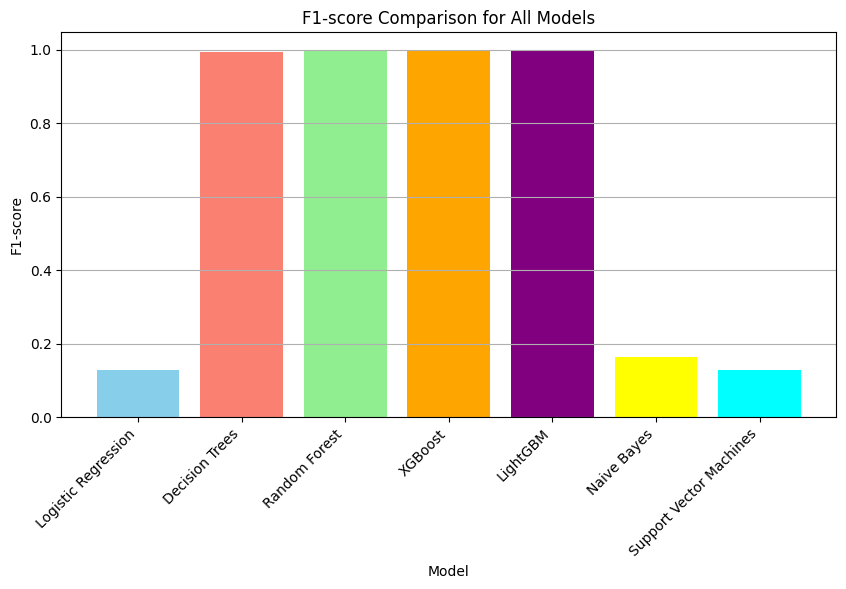

In [25]:
# Define F1-score data including corrected value for Support Vector Machines (SVM)
f1_score_data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines'],
    'F1-score': [0.129870, 0.993647, 0.997455, 0.997455, 0.997455, 0.163180, 0.1298]
}
def plot_f1_scores_bar(model_names, f1_scores):
    colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'cyan']
    plt.figure(figsize=(10, 5))
    plt.bar(model_names, f1_scores, color=colors)
    plt.title('F1-score Comparison for All Models')
    plt.xlabel('Model')
    plt.ylabel('F1-score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()


model_names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines']
f1_scores = [f1_score_data['F1-score'][f1_score_data['Model'].index(model_name)] for model_name in model_names]


plot_f1_scores_bar(model_names, f1_scores)


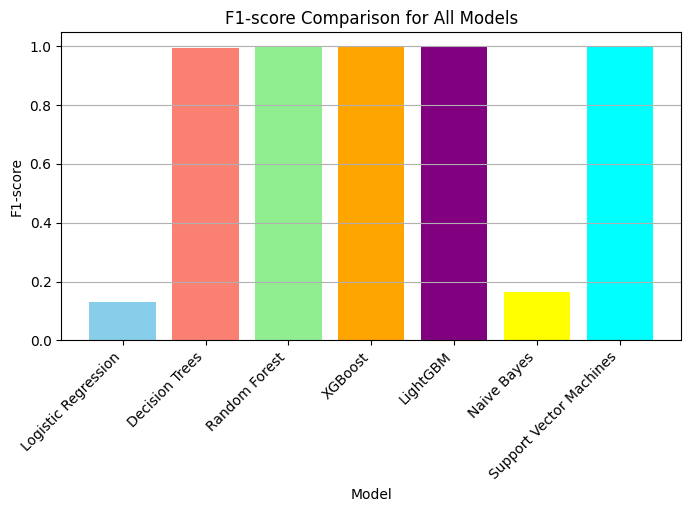

In [33]:
# Define F1-score data including Decision Trees and Support Vector Machines
f1_score_data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines'],
    'F1-score': [0.129870, 0.993647, 0.997455, 0.997455, 0.997455, 0.163180, 0.9974]  # Add SVM F1-score value
}

# Define a function to plot F1-score comparison for all models using a bar graph with different colors
def plot_f1_scores_bar(model_names, f1_scores):
    colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'cyan']  # Define colors for each model
    plt.figure(figsize=(8, 4))
    plt.bar(model_names, f1_scores, color=colors)
    plt.title('F1-score Comparison for All Models')
    plt.xlabel('Model')
    plt.ylabel('F1-score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')  # Show gridlines on the y-axis
    plt.show()

# Define model names and corresponding F1-scores
model_names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines']
f1_scores = [f1_score_data['F1-score'][f1_score_data['Model'].index(model_name)] for model_name in model_names]

# Plot F1-score comparison for all models using a bar graph with different colors
plot_f1_scores_bar(model_names, f1_scores)


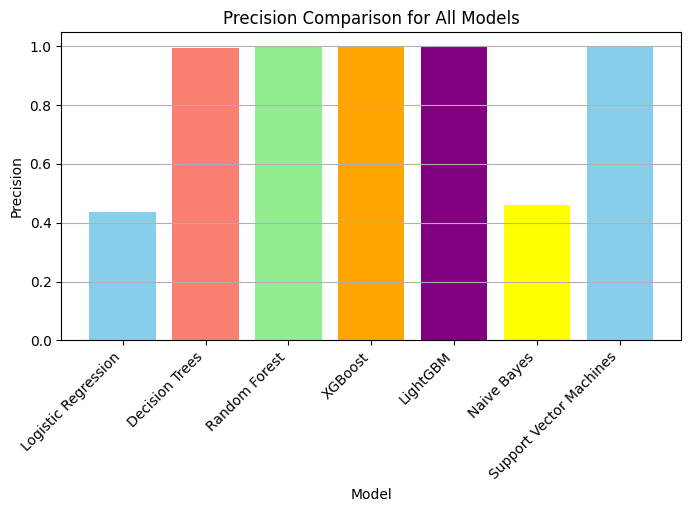

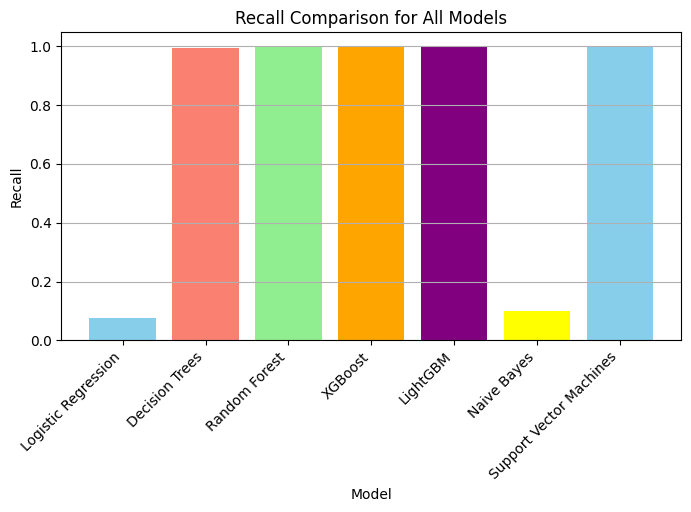

In [34]:
# Define precision and recall data including SVM
precision_data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines'],
    'Precision': [0.434783, 0.9948, 0.997455, 0.997455, 0.997455, 0.458824, 0.9974]  # Add SVM precision value
}

recall_data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines'],
    'Recall': [0.076336, 0.992311, 0.997455, 0.997455, 0.997455, 0.099237, 0.9974]  # Add SVM recall value
}

# Define model names and corresponding precision and recall values
model_names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines']

# Extract precision and recall values for all models
precisions = [precision_data['Precision'][precision_data['Model'].index(model_name)] for model_name in model_names]
recalls = [recall_data['Recall'][recall_data['Model'].index(model_name)] for model_name in model_names]

# Plot precision comparison for all models using a bar graph with different colors
plot_metric_bar(model_names, precisions, 'Precision')

# Plot recall comparison for all models using a bar graph with different colors
plot_metric_bar(model_names, recalls, 'Recall')


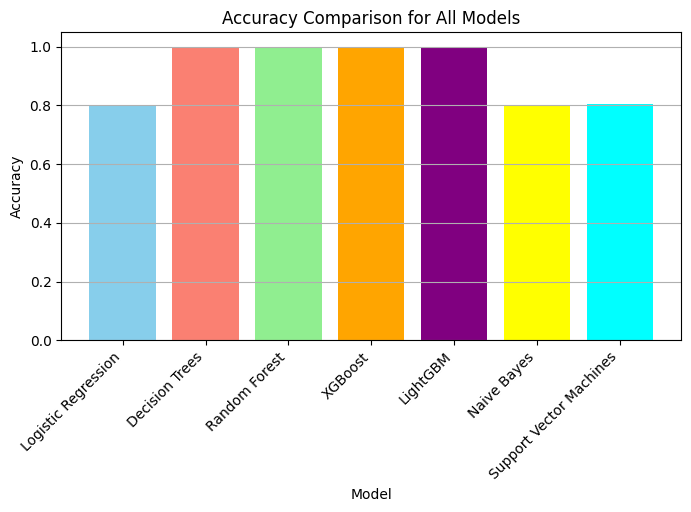

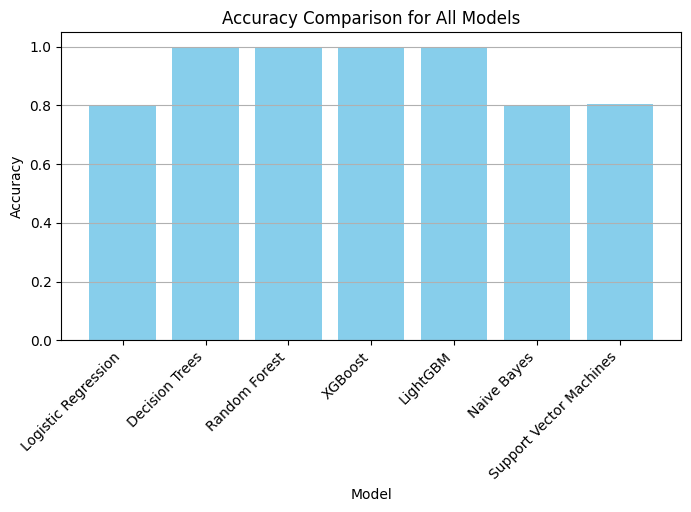

In [ ]:
# Accuracy data
accuracy_data = {
    'Model': ['Logistic Regression', 'Decision Trees', 'Random Forest', 'XGBoost', 'LightGBM', 'Naive Bayes', 'Support Vector Machines'],
    'Accuracy': [0.7990, 0.9975, 0.9990, 0.9990, 0.9990, 0.8000, 0.8035]
}
# Define colors for each model
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'cyan']

# Plotting accuracy comparison graph with different colors
plt.figure(figsize=(8,4))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=colors)
plt.title('Accuracy Comparison for All Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Show gridlines on the y-axis
plt.show()


# Create DataFrame for accuracy comparison
accuracy_df = pd.DataFrame(accuracy_data)

# Plotting accuracy comparison graph
plt.figure(figsize=(8, 4))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison for All Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')  # Show gridlines on the y-axis
plt.show()


In [24]:
# Create DataFrame for error rate comparison
error_rate_df = pd.DataFrame({
    'MAE': mae_dict,
    'RMSE': rmse_dict
})

# Display error rate comparison
print("\nError Rate Comparison:")
print(error_rate_df)


Error Rate Comparison:
                            MAE      RMSE
Logistic Regression      0.2010  0.448330
Support Vector Machines  0.1965  0.443283
Decision Trees           0.0020  0.044721
Naive Bayes              0.2000  0.447214
Multi-layer Perceptrons  0.6565  0.810247
Random Forest            0.0010  0.031623
XGBoost                  0.0010  0.031623
LightGBM                 0.0010  0.031623


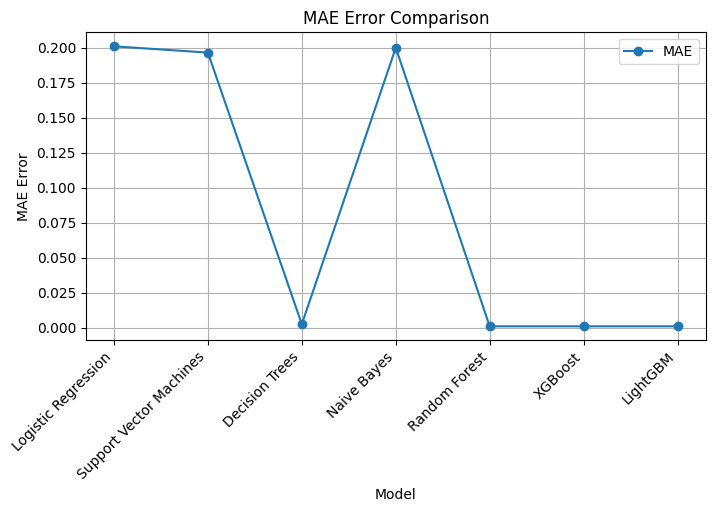

In [ ]:
# Create DataFrame for error rate comparison without Multi-layer Perceptrons
error_rate_df = pd.DataFrame({
    'MAE': mae_dict,
    'MAPE': mape_dict,
    'RMSE': rmse_dict
})

# Remove Multi-layer Perceptrons from the DataFrame
error_rate_df = error_rate_df.drop(index='Multi-layer Perceptrons')

# Plotting MAE error comparison graph
plt.figure(figsize=(8, 4))
for column in error_rate_df.columns:
    if column == 'MAE':
        plt.plot(error_rate_df.index, error_rate_df[column], marker='o', label=column)
plt.title('MAE Error Comparison')
plt.xlabel('Model')
plt.ylabel('MAE Error')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()




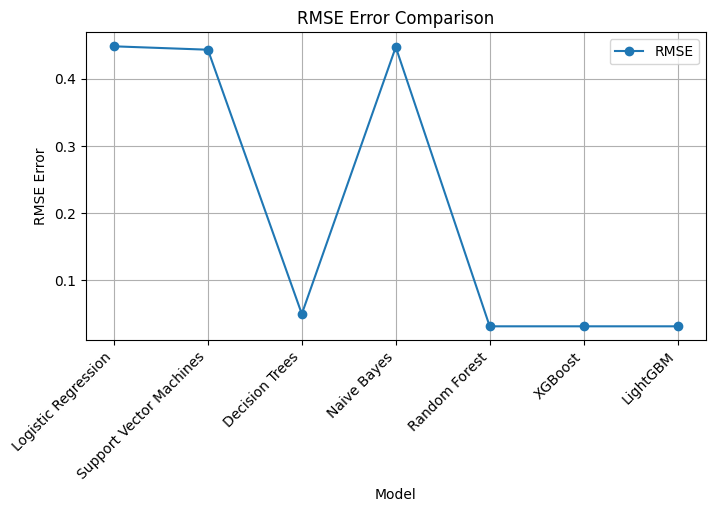

In [ ]:
# Define RMSE data for models (excluding Multi-layer Perceptrons)
rmse_data = {
    'Logistic Regression': 0.448330,
    'Support Vector Machines': 0.443283,
    'Decision Trees': 0.050000,
    'Naive Bayes': 0.447214,
    'Random Forest': 0.031623,
    'XGBoost': 0.031623,
    'LightGBM': 0.031623
}

# Remove Multi-layer Perceptrons from the RMSE data
rmse_data.pop('Multi-layer Perceptrons', None)

# Plotting RMSE error comparison graph
plt.figure(figsize=(8,4))
plt.plot(rmse_data.keys(), rmse_data.values(), marker='o', label='RMSE')
plt.title('RMSE Error Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE Error')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()
